# La elevación de la Tierra

Estudiantes: Irma Scheihing, Pablo González.

## Cargar Módulos

Usaremos el módulo ```numpy``` para tratar los datos como arreglos/matrices y usaremos ```matplotlib``` para visualizar datos. Estos módulos se importan como ``np`` y ``plt`` respectivamente para que podamos acceder a sus funciones con esos códigos como abreviatura. Importar estos diferentes módulos y recordar estas abreviaturas puede resultar un poco engorroso al principio, pero se irán acostumbrando a medida que avance el semestre.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Cargando los datos topográficos 

Primero cargaremos los archivos de topografía global que analizaremos usando la función ``np.loadtxt``.

Antes de usar la función, echemos un vistazo a su docstring. Escribiendo el nombre de una función con ``?`` al final, vemos una descripción de lo que hace la función, qué parámetros deben pasarse y qué parámetros adicionales se pueden proporcionar. Otra forma de obtener esta misma información es presionar ``shift + tab`` después del nombre de la función.

In [2]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    like=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of cha

Hay tres archivos: una matriz de latitudes (tamaño 540 x 1; ``etopo20lats.txt`` '), una matriz de longitudes (tamaño 1081 x 1; ``etopo20lons.txt``) y una matriz cuadriculada de topografía con unidades de metros (tamaño 540 x 1081; ``etopo20data.txt``). Cargaremos los archivos y los asignaremos a las variables ``lats``, ``lons`` y ``topo_grid``. 

Estos archivos están dentro de la carpeta de datos que es una subcarpeta de la carpeta en la que se encuentra este cuaderno. Para cargarlos, debemos proporcionar la ruta que es *string* que le dice a Python dónde está el archivo en relación al directorio actual. Para el archivo de latitud, esa ruta es '``data/etopo20lats.txt``'

In [3]:
lats = np.loadtxt('data/etopo20lats.txt') 
lons = np.loadtxt('data/etopo20lons.txt')
topo_grid = np.loadtxt('data/etopo20data.txt')

## Inspecionando los datos

Estos datos son un modelo global de topografía (puntos sobre el nivel del mar) y batimetría (puntos por debajo del nivel del mar) generado por el National Geophysical Data Center (NGDC) y National Oceanic and Atmospheric Administration (NOAA) de los EEUU. Estamos usando la versión de 20 segundos de arco de los datos (1/3 de grado). Hay disponibles datos de resolución aún mayor: https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ngdc.mgg.dem:316

Siempre ayuda ver los datos, así que imprimamos el arreglo de las latitudes y comprobemos que es efectivamente una arreglo de latitudes.


In [4]:
print(topo_grid)

[[ 2804.      2804.      2804.     ...  2804.      2804.      2804.    ]
 [ 2831.      2831.      2831.     ...  2831.      2831.      2831.    ]
 [ 2808.      2808.      2808.     ...  2808.      2808.      2808.    ]
 ...
 [-4349.375  -4350.     -4350.25   ... -4348.8125 -4349.125  -4349.375 ]
 [-4311.5625 -4311.875  -4312.5    ... -4310.875  -4311.375  -4311.5625]
 [-4291.5    -4291.5    -4291.5    ... -4291.5    -4291.5    -4291.5   ]]


El arreglo topo_grid es más complicado que el arreglo de latitudes. El arreglo lats es unidimensional ``[90, 89, 88, ..]`` mientras que la matriz topo_grid es bidimensional con una elevación para cada valor de latitud y longitud. Podemos determinar la forma de la matriz topo_grid usando ``.shape``.

In [5]:
topo_grid.shape

(540, 1081)

# Visualizando la distribución de los datos

Ahora podemos plotear un histograma simple con la función ``hist`` dentro de la librería ``matplotlib`` que muestra el número de puntos de elevación dentro de un número específico de bins. Recuerden que importamos ``matplotlib.pyplot`` como ``plt``, por lo que para acceder a la función ``hist`` de matplotlib podemos usar ``plt.hist``.


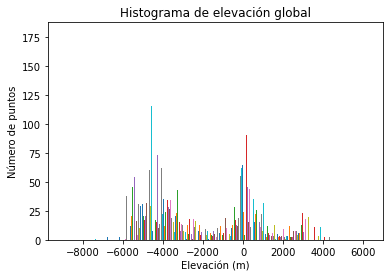

In [20]:
plt.hist(topo_grid,bins=50,label='elevation data')
plt.xlabel('Elevación (m)')
plt.ylabel('Número de puntos')
plt.title('Histograma de elevación global')
plt.show()

<font color=darkred>Pregunta:</font> Cómo describirían la distribución de las elevaciones?


Se pueden distinguir dos claras tendencias dentro del histrograma. La primera entre los 4000 y 6000 mbnm, que puede denotar una extension significativa del fondo oceanico promedio. La segunda tendencia se genera cerca del nivel del mar, en donde se observan valores que pueden corresponder en mayor parte a la superficie terrestre plana cercana al nivel del mar.

Además de lo anterior, se puede observar una leve concentración de alturas en torno a las alturas de 2000 y 4000 msnm. Lo anterior puede demarcar el grueso de las diversas cadenas montañosas y volcanes existentes en la corteza terrestre.

## Calcular máxima y mínima de elevación global
Numpy tiene funciones útiles que nos permiten determinar algunas propiedades de los datos. En este caso, investiguemos el mínimo y el máximo del arreglo ``topo`` (los valores están en metros).

In [7]:
topo_max = np.max(topo_grid)
topo_min = np.min(topo_grid)
print(topo_max)
print(topo_min)

6228.8125
-9026.625


<font color=darkred>Pregunta de debate:</font> La cima del monte Everest es 8848 metros. Por qué los datos muestran un valor diferente a ese?



Porque la distribución de la muestra de datos seleccionada no es continua, y por tanto, no necesariamente habrá un punto de datos en el lugar exacto de la cima delEverest.

## Calcular la media de la elevación global
<font color = goldenrod> Parte en la cual ustedes deben programar</font>

Calcule la media de topo_array usando la función ``np.mean()`` y asígnesela a la variable ``topo_mean``.

Calcule la desviación estándar de ``topo_array`` usando la función ``np.std()`` y asígnesela a la variable ``topo_sigma``.

Determine el número de puntos de elevación en el arreglo ``topo_array`` usando la función ``len()`` y asígneselo a la variable ``topo_n``.

In [8]:
## Escriba su codigo aqui
topo_mean = np.mean(topo_grid)
topo_sigma = np.std(topo_grid)
#largo de una fila por largo de una columna
topo_n = len(topo_grid)*len(topo_grid[0])

print(topo_mean,topo_n,topo_sigma)

-1894.698856618529 583740 2653.7912181233532


## Generar elevaciones sintéticas para un hipótetico *Planeta 'Normal'*. 
Usando ``topo_mean``, ``topo_sigma`` y ``topo_n`` que calculó en la parte anterior, genere elevaciones sintéticas para un planeta con una distribución normal de elevación. Una distribución normal también se conoce como distribución gaussiana o de curva de campana y se puede definir a partir de media y una desviación estándar. Llamemos a este planeta el *Planeta Normal*. Los planetas *Normales* no son tan raros, de hecho Venus es uno de ellos (ver figura, Kostama 2006).

<img src="venus_elevacion.png">

La función ``np.random.normal`` genera puntos aleatorios a partir de una distribución normal y podemos especificar que tiene la misma media que la elevación de la Tierra (``topo_mean``), la misma desviación estándar de ``topo_sigma`` y que se extraen de la distribución tantos puntos como tengamos en el conjunto de datos (``topo_n``).

In [9]:
topo_n = len(lats)*len(lons)
Planet_Norm_topo = np.random.normal(topo_mean,topo_sigma,topo_n)

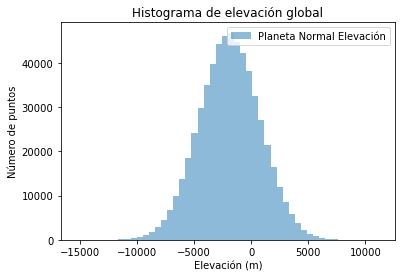

In [10]:
plt.hist(Planet_Norm_topo,bins=50,label='Planeta Normal Elevación',alpha=0.5)
#plt.hist(topo_grid,bins=50,label='Earth elevation data',alpha=0.5)

plt.xlabel('Elevación (m)')
plt.ylabel('Número de puntos')
plt.title('Histograma de elevación global')
plt.legend()
plt.show()

## Graficar la curva hipsométrica del Planeta Normal
La curva hipsométrica es la curva que muestra la elevación de un planeta versus el porcentaje del planeta que se encuentra sobre esa elevación. Es decir, esta curva responde la pregunta: ¿qué porcentaje de puntos están sobre una elevación dada?. *Dato curioso: Nótese que esto vendría siendo la integral de la curva que forma el histograma*. 

Para obtener esta curva, ordene los datos de mayor a menor y grafíquelo. Sea coherente con el eje x. Trace la curva del *Planeta Normal* en una figura junto con la curva hipsométrica de la Tierra. <font color=goldenrod>Código que ustedes deben programar</font>.

In [11]:
## Generate the sort Planet Norm topo here
Planet_Norm_topo_sort = -np.sort(-Planet_Norm_topo)
# Da un array dentro de otro, tomamos el array interior
topo_grid_sort = -np.sort(-topo_grid.reshape(1,583740))[0]

xaxis =  np.arange(0,len(lons)*len(lats))/(len(lons)*len(lats))*100

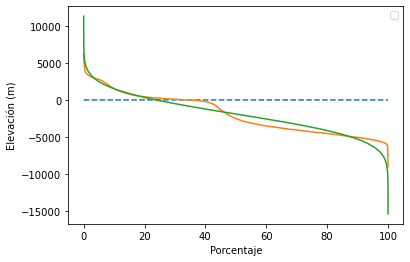

In [12]:
### Make a plot with Earth data and the synthetic Planet Norm data here
plt.legend(['Planeta Normal', 'Tierra'])
plt.xlabel('Porcentaje')
plt.ylabel('Elevación (m)')
plt.plot(xaxis,xaxis*0,linestyle='dashed',label='Nivel del Mar')

plt.plot(xaxis,topo_grid_sort,label='Curva Hipsométrica Tierra')
plt.plot(xaxis,Planet_Norm_topo_sort,label='Curva Hipsométrica Planeta Normal')

plt.show()


Podemos observar las curvas hipsométricas de Planeta Normal cruzan cero para determinar qué porcentaje de la elevación del planeta está sobre el nivel del mar. Coloque el código usado en la celda anterioren una nueva celda y use las funciones ``plt.xlim()`` y ``plt.ylim()`` para acercar las curvas y visualizar dónde las curvas cruzan el nivel del mar. <font color=goldenrod>Código que ustedes deben programar</font>

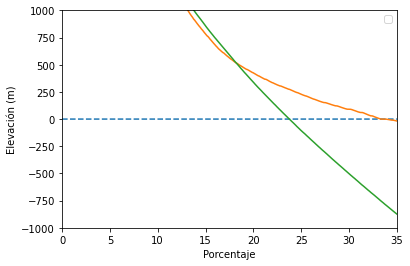

In [13]:
### Cambie el eje x para encontrar donde se intersectan ambas curvas

### Make a plot with Earth data and the synthetic Planet Norm data here
plt.legend(['Planeta Normal', 'Tierra'])
plt.xlabel('Porcentaje')
plt.ylabel('Elevación (m)')
plt.plot(xaxis,xaxis*0,linestyle='dashed',label='Nivel del Mar')

plt.plot(xaxis,topo_grid_sort,label='Curva Hipsométrica Tierra')
plt.plot(xaxis,Planet_Norm_topo_sort,label='Curva Hipsométrica Planeta Normal')
plt.xlim(0,35)
plt.ylim(-1000,1000)
plt.show()

<font color = darkred> Pregunta de debate: </font> Qué porcentaje de la Tierra esta cubierto de agua? ¿Hay más o menos tierra sobre el nivel del mar en la Tierra o en el planeta Normal? ¿Por qué es este el caso?

En la tierra, el porcentaje de superficie cubierto por agua es de aproximadamente un 66%, mientras que en el planeta normal, este valor llega a un 76%. Lo anterior indica que hay más tierra sobre el nivel del mar en la Tierra que en el planeta Normal.

 Esto último se debe a la diferencia de densidad entre las placas que componen la corteza terrestre, lo que genera un fenomeno de subducción sobre estas. En particular, las placas oceanicas quedan posicionadas por debajo de las continentales, lo que genera una mayor cantidad de superficie sobre el nivel del mar.



# Hacer un mapa topográfico

Los histogramas y los CDF son dos visualizaciones 1D útiles de nuestros datos, pero ¿qué pasa con la distribución de la topografía en todo el mundo?

Nuevamente, necesitaremos manipular un poco los datos. Necesitamos cuadrículas de latitud y longitud para mapear la topografía. Como topo_grid serán (tamaño 540 x 1081). lat_grid tendrá filas de latitud constante y lon_grid tendrá columnas de longtiude constante. Para hacer esto, llamaremos a las funciones numpy repeat, reshape y tile.

In [14]:
# repeat the array of latitudes 1081 times
latitude =  np.repeat(lats,1081) 

# reshape that (583740,1) element array to (540,1081)
lat_grid = latitude.reshape(540,1081) 

# repeat the array of longtitudes 540 times as rows
lon_grid = np.tile(lons,(540,1))

## Importar cartopy
Vamos a usar el módulo cartopy para hacer mapas usando sus herramientas de referencia de coordenadas, así que vamos a importarlo.

In [15]:
import cartopy.crs as ccrs

## Usar la función contourf para hacer el mapa

Utilice las cuadrículas de latitud y longitud para trazar un mapa topográfico de proyección Robinson utilizando la función cartopy contourf. Esta función es lenta, así que no se preocupe si tarda un poco en ejecutarse.

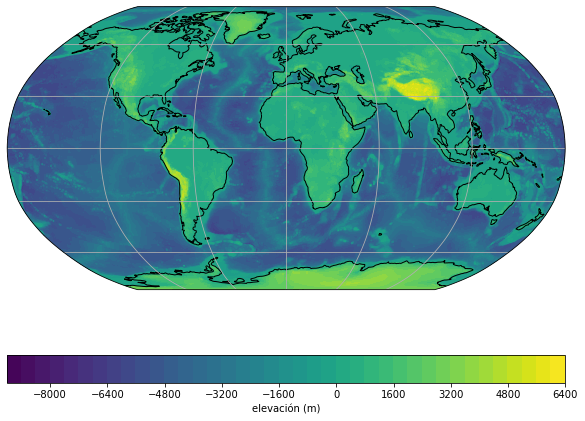

In [16]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid, levels=40, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevación (m)')

plt.show()

## Diferentes proyecciones
Como ya saben, cartopy admite una serie de proyecciones diferentes que permiten que la superficie tridimensional de la Tierra se muestre en 2 dimensiones en nuestros computadores. Me gusta la proyección de Robinson que usamos anteriormente. Como hiciste en la tarea, sigue adelante y ejecuta la celda de abajo para ver qué dice eso sobre mí.

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://imgs.xkcd.com/comics/map_projections.png')

## Visualización de las partes más superficiales y profundas del océano

Usemos la proyección ``Orthographic`` (¡A GLOBE! En la caricatura de arriba) para observar la gran cadena montañosa submarina de la cordillera del Atlántico Medio.

El siguiente bloque de código necesita que se complete la función ``plt.contourf``. Utilice los mismos inputs que usamos anteriormente como guía. Además, agregue el parámetro ``vmax`` y ajústelo a cero para que la barra de colores solo corresponda a elevaciones por debajo del nivel del mar.

<font color = goldenrod> Código para ustedes escriban </font>

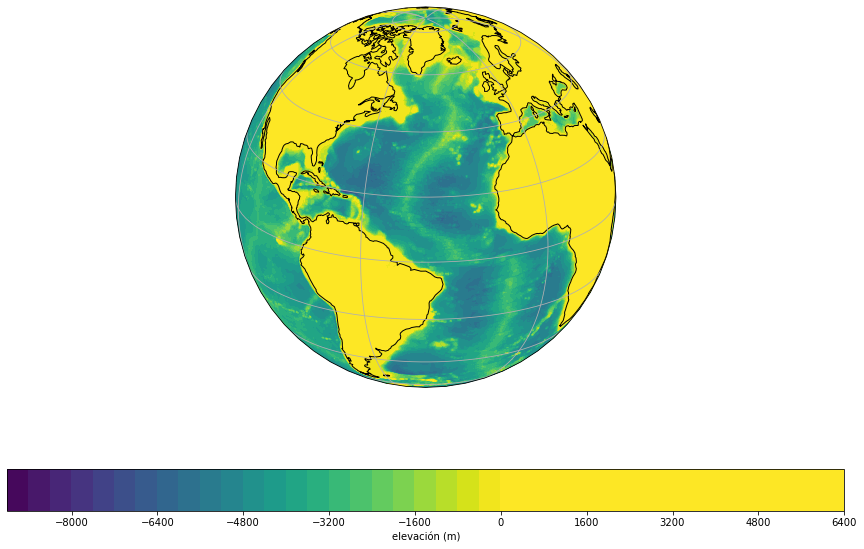

In [18]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-40,
    central_latitude=20))
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid, levels=40,vmax =0, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevación (m)')

plt.show()

Usemos la proyección ortográfica para mirar la Fosa de las Marianas. Un globo centrado en una longitud de 145ºE y 20ºN funcionará bien.


El siguiente bloque de código deben completar las funciones ``plt.axes`` y ``plt.contourf``. Para los ejes ``plt.``, Utilice los ``ccrs.Orthographic`` centrados a una longitud de 145ºE y 20ºN.


<font color = goldenrod> Código para escribir </font>

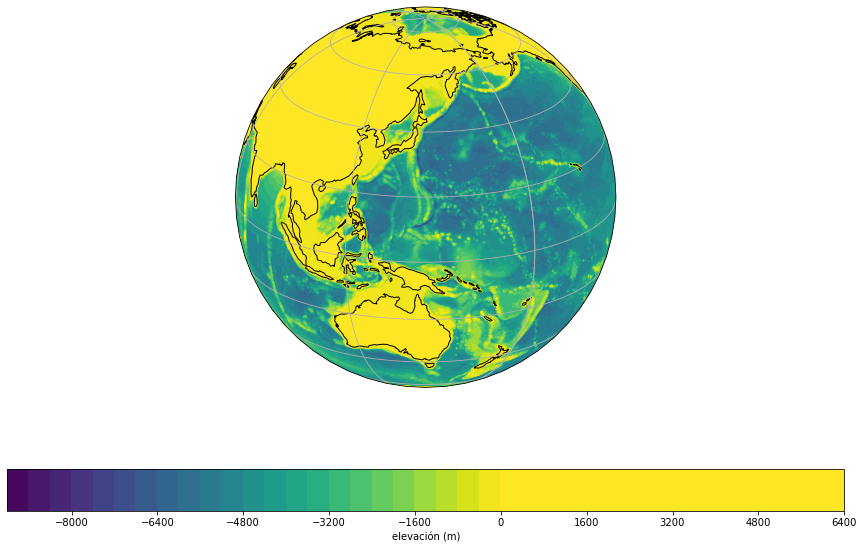

In [19]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=145,
    central_latitude=20))
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid, levels=40,vmax =0, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.colorbar(ax=ax,orientation='horizontal',label='elevación (m)')

plt.show()

<font color=darkred>Preguntas de debate:</font> 
¿Dónde están los puntos más altos del océano? ¿Qué está sucediendo allí?
¿Dónde están los puntos más bajos del océano? ¿Qué está sucediendo allí?

Los puntos más altos del oceano se encuentran principalmente en lugares donde existe divergencia de placas (dondo las placas se separan y nuevo material sale y se acomula sobre el fondo marino). Además de esto, se pueden generar elevaciones o cordilleras en zonas de convergencia de placas (siendo esto menos comun bajo el mar).

Los puntos más bajos del oceano se encuentran en las fosas generadas por la subducción de placas en las zonas donde estas convergen.